## Using student data to predict final grade scores, and outputting the best model accuracy, this was done in a tensorflow conda environment

In [101]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [102]:
data =pd.read_csv('student-mat.csv', sep = ';')

Choosing needed columns for regression

In [103]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
print(data.head())

   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4


Scatter plot showing best correlation between attributes and final grades, result of best correlating attributes where:
- G1 which is first grade
- G2 which is second grade

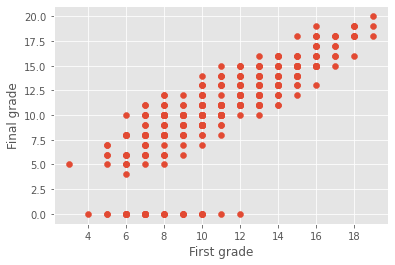

In [115]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel("First grade")
pyplot.ylabel("Final grade")
pyplot.show()

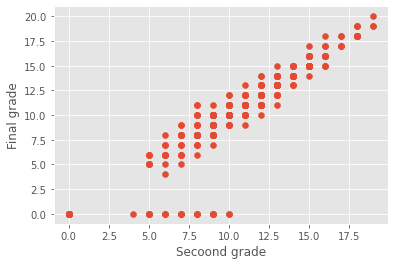

In [119]:
p = "G2"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel("Secoond grade")
pyplot.ylabel("Final grade")
pyplot.show()

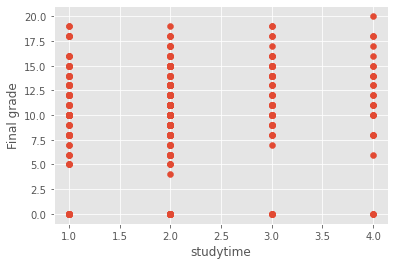

In [118]:
p = "studytime"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel("studytime")
pyplot.ylabel("Final grade")
pyplot.show()

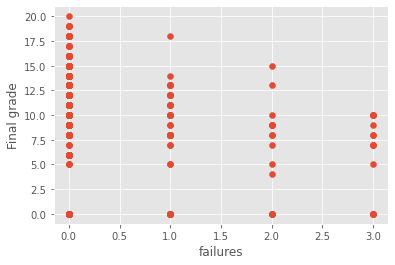

In [117]:
p = "failures"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel("failures")
pyplot.ylabel("Final grade")
pyplot.show()

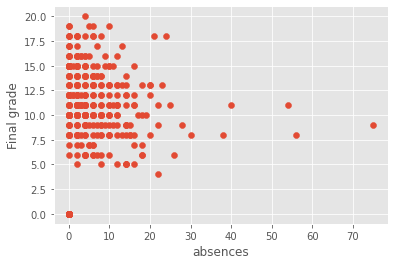

In [116]:
p = "absences"
style.use("ggplot")
pyplot.scatter(data[p],data["G3"])
pyplot.xlabel("absences")
pyplot.ylabel("Final grade")
pyplot.show()

Defining prediction as G3 which is the final grade

In [104]:
predict = "G3"

 - Splitting 10 percent of data into test samples
 - Creating a training model , fitting it and saving it using pickle only if the model score is  better than any previous score, this is run 30 times

In [105]:
x = np.array(data.drop([predict],1))
y = np.array(data[predict])
x_train,x_test, y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)

# best = 0
# for _ in range(30):
    
#     x_train,x_test, y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size=0.1)
    
#     linear =linear_model.LinearRegression()
#     linear.fit(x_train,y_train)
#     accuracy = linear.score(x_test,y_test)
#     print(accuracy)
    
#     if accuracy >best:
#         best = accuracy

#     with open('grade_model.pickle',"wb") as f:
#         pickle.dump(linear,f)

/var/folders/qy/m971fcv55jn3g1wy23pgyslr0000gn/T/ipykernel_97784/1830272045.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = np.array(data.drop([predict],1))


Reading in pickle file

In [106]:
pickle_in = open("grade_model.pickle", "rb")
linear = pickle.load(pickle_in)

Predicting based on input what the  final grade of a student would look like

In [107]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x],x_test[x],y_test[x])

-0.8047927249265022 [6 0 2 0 0] 0
5.306188241853163 [7 6 2 0 4] 6
8.511335094681579 [8 9 2 0 8] 10
5.516604122931041 [7 6 1 0 5] 7
3.73207649854365 [7 5 3 1 0] 0
20.00035246677567 [18 19  1  0 10] 19
9.47590924252802 [ 8  9  1  1 38] 8
8.612234001937258 [10  9  3  0  7] 9
15.280951786497525 [16 15  2  0  0] 15
9.82210795452211 [10 10  1  0  4] 10
12.21936796618793 [12 12  2  0 13] 13
12.876756861363026 [13 13  2  0  0] 12
19.85669712206528 [18 19  1  0  6] 19
13.814521532490216 [13 14  3  0  4] 14
8.841494533748639 [9 9 1 0 8] 10
5.049691959661294 [7 6 1 1 0] 0
8.578095631049068 [8 9 1 0 5] 9
9.8341100039785 [11 10  1  0  0] 10
12.276263606127712 [10 13  4  0  6] 13
-0.7619762682412041 [7 0 1 1 0] 0
6.8312573081286825 [6 8 1 1 0] 8
11.083189463439249 [13 11  2  0  4] 11
11.21875537701134 [ 9 12  3  0  3] 11
13.01525275789414 [10 13  1  0 12] 12
13.886349204845411 [13 14  3  0  6] 14
12.346046437645793 [14 12  1  0  3] 12
10.700047002750496 [11 11  2  0  2] 10
18.516945339515836 [17 18 

Final output was a linear model of 91.4 percent accuracy

In [113]:
accuracy = linear.score(x_test,y_test)
print(accuracy)

0.9145749323707703
